## Setup

### Load packages

In [1]:
suppressPackageStartupMessages({
    library(ggplot2)
    library(dplyr)
    library(statsr)})

In [2]:
load("gss.Rdata")


## Part 1: Data

The General Social Surveys (GSS) are US nation wide surveys collected since 1972. The dataset that will be used during the analysis cover the periods ranging from 1972 to 2012. The dataset has a mixture of permanent, rotating and occasional questions.

Since it's a national survey, the US population representativeness is guaranteed, the analysis that can be extracted from the data can be **generalized**. Furthermore, the survey comes with weights to compensate the data collection and over/under representation. The documents presented with the data comments about the survey methodology in the Appendix A of the ICPSR Codebook. However, this document is hard to get and couldn't be consulted. Randomness of the poll is assumed given the institutional character of the data published.

In the other hand, the data included in the course has a disclaimer: ```[..] we have removed missing values from the responses and created factor variables when appropriate to facilitate analysis using R. [..]``` it's probable that some of the representativeness is missing using the material provided by the course.

Random Assignment have not been used during the surveys, hence there is impossible to determine causality with the data provided.

### A quick look into data
Let's take a first look at the dataset that will be used for the Explanatory Data Analysis (EDA) and following Inference. We will start having a look at the first observations. As it can also be observed the dataset consists of 57061 observations and 114 features.

In [3]:
head(gss)
dim(gss)

,caseid,year,age,sex,race,hispanic,uscitzn,educ,paeduc,maeduc,⋯,news,tvhours,racdif1,racdif2,racdif3,racdif4,helppoor,helpnot,helpsick,helpblk
,<int>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,⋯,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,1,1972,23,Female,White,NA,NA,16,10,NA,⋯,Everyday,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,2,1972,70,Male,White,NA,NA,10,8,8,⋯,Everyday,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,3,1972,48,Female,White,NA,NA,12,8,8,⋯,Everyday,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,4,1972,27,Female,White,NA,NA,17,16,12,⋯,Once A Week,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,5,1972,61,Female,White,NA,NA,12,8,8,⋯,Everyday,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,6,1972,26,Male,White,NA,NA,14,18,19,⋯,Everyday,NA,NA,NA,NA,NA,NA,NA,NA,NA


[1] 57061   114

* * *

## Part 2: Research question

During the project will be working with the pre-marital sex. It's a controversial question that may have gained acceptance during the decades. Fortunately, we have a vast dataset to compare between the main ideas in the '70s and in the 2010's. Does the data show evidence in mind shift between that times and now?. 

What the respondents had to answer was the following question:

``If a man and woman have sex relations before marriage, do you think it is always wrong, almost always wrong, wrong only sometimes, or not wrong at all?``

Let's filter the dataset to have a subset with only the question to analyze. We're interested in the answers from the early survey dates and the latests, so we'll compare 2021 vs 1972.

In [4]:
# Clean and filter the dataset
premarsex <- gss %>% 
    select(year, sex, premarsx) %>%
    filter(year == "2012" | year == "1972", !is.na(premarsx)) %>%
    mutate(year=cut(year,2, labels=c("1972", "2012")))

# Summarise observations per year
premarsex %>%
    group_by(year) %>%
    summarise(count=n())

str(premarsex)

year,count
<fct>,<int>
1972,1537
2012,1255


'data.frame':	2792 obs. of  3 variables:
 $ year    : Factor w/ 2 levels "1972","2012": 1 1 1 1 1 1 1 1 1 1 ...
 $ sex     : Factor w/ 2 levels "Male","Female": 2 1 2 2 2 1 1 1 2 2 ...
 $ premarsx: Factor w/ 5 levels "Always Wrong",..: 4 1 1 1 3 3 4 3 4 1 ...


In principle, sample sizes are significantly large to use and make further inferences tests. We need to check also if the distributions are not extremely skewed so as to require a large number of samples.

* * *

## Part 3: Exploratory data analysis

The respondents had to answer to a restricted universe of 4 different categories:
- Always Wrong
- Almost always wrong
- Wrong only sometimes
- Not wrong at all

### Plots

We'll start doing a bar chart plot, to see how the data is distributed for both groups: 1972 and 2012.

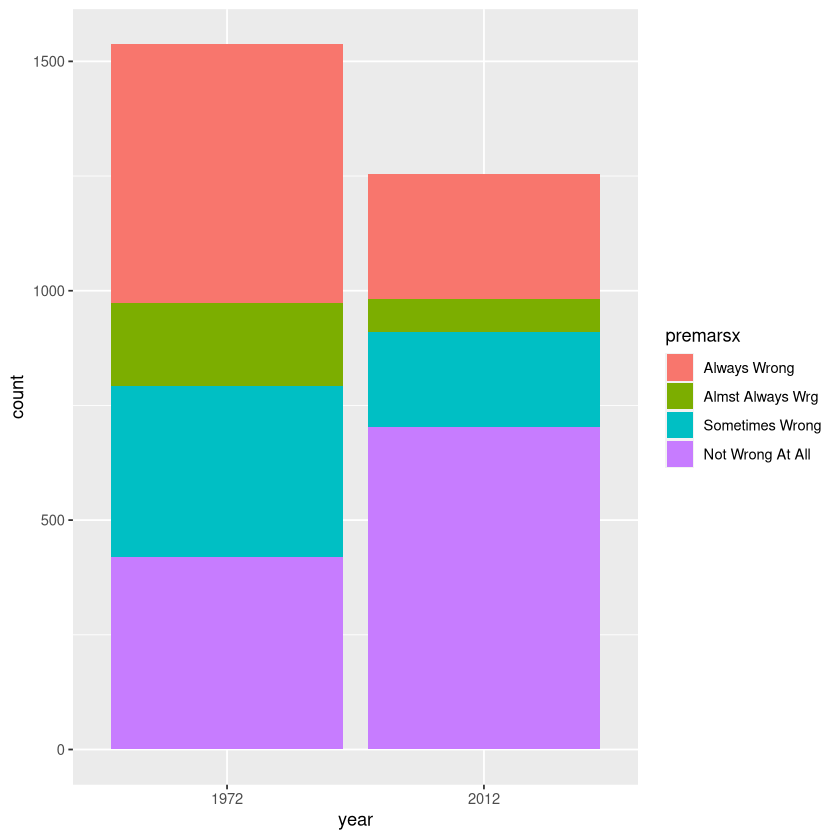

In [5]:
ggplot(premarsex, aes(x=year, fill=premarsx)) + geom_bar()

As mentioned before, the sampling size is quite huge, randomized and diverse based on the GSS. We're particularly interested in the `Not Wrong At All` category. The difference seems to be significantly relevant, but we'll leave the technical details for further analysis in the inference section.

### Summary statistics

Alongside the plot created which shows the proportions between years, we'll construct a distribution table to work with the numbers analytically in the following paragraphs. The table summarize the values per groups and the partial totals, as well.

In [6]:
premarsex %>%
    group_by(year, premarsx) %>%
    summarise(count=n(),.groups='keep')

year,premarsx,count
<fct>,<fct>,<int>
1972,Always Wrong,563
1972,Almst Always Wrg,182
1972,Sometimes Wrong,373
1972,Not Wrong At All,419
2012,Always Wrong,273
2012,Almst Always Wrg,72
2012,Sometimes Wrong,206
2012,Not Wrong At All,704


This information can be shown in a pivot table for better representation. On the right side, we see the observations favorable to having sex before marriage, and the left columns contains the groups which disables pre-marital sex. As it can be seen, the opinion has changed toward the years, apparently population in general seems to be more open-minded about this fact.


|  | Always | Almst Always | Sometimes | Not Wrong | Total |
| -----| -------| -------------| ----------| ----------| ----- |
| 1972 | 563 | 182 | 373 | 419 | 1537 |
| 2012 | 273 | 72 | 206 | 704 | 1255 |
| Total | 863 | 254 | 579 | 1123 | 2819 |

### Preliminary Conclusions

The data related to `premarital sex approval` has been presented both in a bar plot and a summary table. After an analysis through the group distributions there seems to be a favorable case for rejecting the null hypothesis $H_0$, this is, there's strong evidence of a mind shift in public opinion about premarital sex. We'll evaluate these hypothesis in the following paragraph.

* * *

## Part 4: Inference

We would like to know if there's been a mind shift in public opinion towards `premarital sex`. Hence, we will state the following hypothesis to work with through the rest of the paragraph.

$H_0$: There is no change in opinion about `premarital sex` between 1972 and 2012.

$H_A$: In fact there's a mind shift in public opinion and `premarital sex` is more accepted latest years.

### Methodology

We'll be working with categorical data thus, we'll start performing a `Chi-square Goodness of Fit` test to verify if there's evidence which support a shift in **group proportions**. After it, we'll take a closer look to the `Not Wrong At All` group and compare proportions with a `difference of two proportions` test. This will tell us if the data provides sufficient evidence of a mind shift in general population. 

Particularly for the Chi-squared goodness of fit test, we'll assume the ground true distribution p is the one obtained from the data of 1972.

### Conditions

We'll start checking the conditions to perform the hypothesis tests for the both techniques described before.

#### Chi-Square Test
There are two conditions that must be checked before performing a chi-square test:
- Independence. Each case that contributes a count to the table must be independent of all the other cases in the table. 
- Sample size / distribution. Each particular scenario (i.e. cell count) must have at least 5 expected cases. Failing to check conditions may affect the test's error rates.

Regarding the independence of the samples, since the observations are randomized and only one adult person is selected per house, the observations can be treated as independent. In the other hand, the sample size for each of the cases is well above 5, hence the condition is also satisfied.

#### Difference of two proportions
The difference $p̂1 − p̂2$ can be modeled using a normal distribution when 
- Independence, extended. The data are independent within and between the two groups. Generally this is satisfied if the data come from two independent random samples or if the data come from a randomized experiment. 
- Success-failure condition. The success-failure condition holds for both groups, where we check successes and failures in each group separately.

The observations are independent as stated before for the analysis of the Chi-squared conditions. Observations are independent between groups due to the randomness of the GSS sampling technique. Furthermore, the time between samples may help for independence, since many people polled in the '72 may have passed away.

In [7]:
# We'll assume the standard distribution p is the one obtained from the data of 1972. 
# p proportions will be obtained passing rescale.p=TRUE which is equivalent to divide them
# by 1537, the total respondents

premsx_2012 <- c(273, 72, 206, 704)
chisq.test(premsx_2012, p = c(563, 182, 373, 419), rescale.p=TRUE )


	Chi-squared test for given probabilities

data:  premsx_2012
X-squared = 529.98, df = 3, p-value < 2.2e-16


Next, we'll regroup the data and create two groups:
- `Not Wrong At All`
- `Other`, to indicate somehow the opposite opinion, even when in reality there are some degrees of acceptance.

In [8]:
premsx_ht <- premarsex %>%
    mutate(premarsx = ifelse(premarsx=="Not Wrong At All", 
                             "Not Wrong At All",
                             "Other"))

Response variable: categorical (2 levels, success: Not Wrong At All)
Explanatory variable: categorical (2 levels) 
n_1972 = 1537, p_hat_1972 = 0.2726
n_2012 = 1255, p_hat_2012 = 0.561
H0: p_1972 =  p_2012
HA: p_1972 != p_2012
z = -15.4566
p_value = < 0.0001

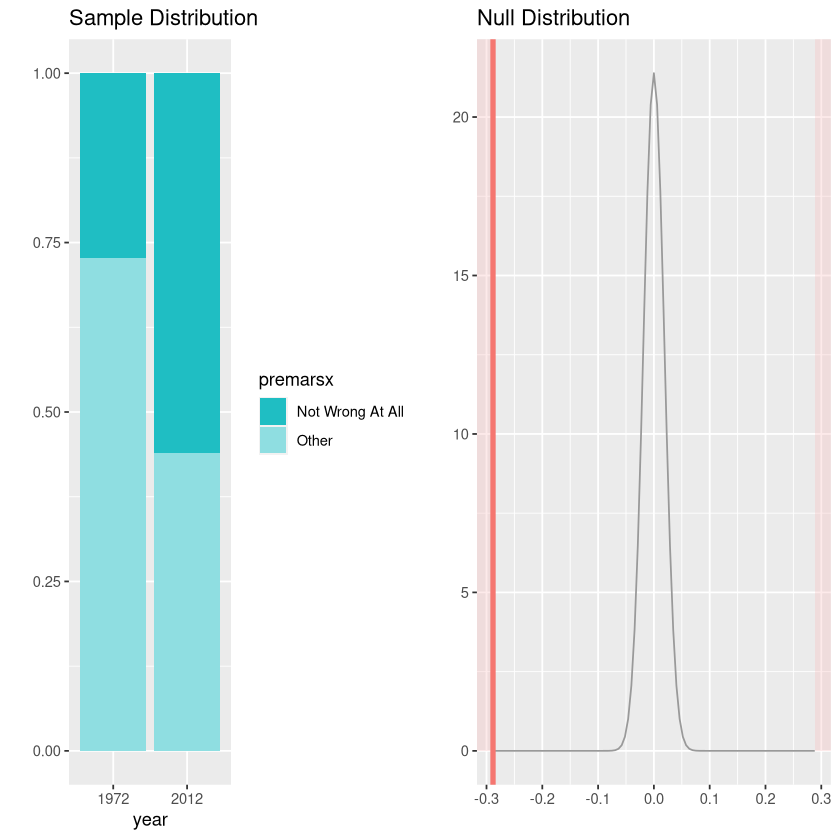

In [9]:
inference(y=premarsx, x=year, data=premsx_ht, statistic="proportion", type="ht",
          null=0, alternative="twosided",  method="theoretical", 
          success="Not Wrong At All")

Response variable: categorical (2 levels, success: Not Wrong At All)
Explanatory variable: categorical (2 levels) 
n_2012 = 1255, p_hat_2012 = 0.561
n_1972 = 1537, p_hat_1972 = 0.2726
95% CI (2012 - 1972): (0.253 , 0.3237)


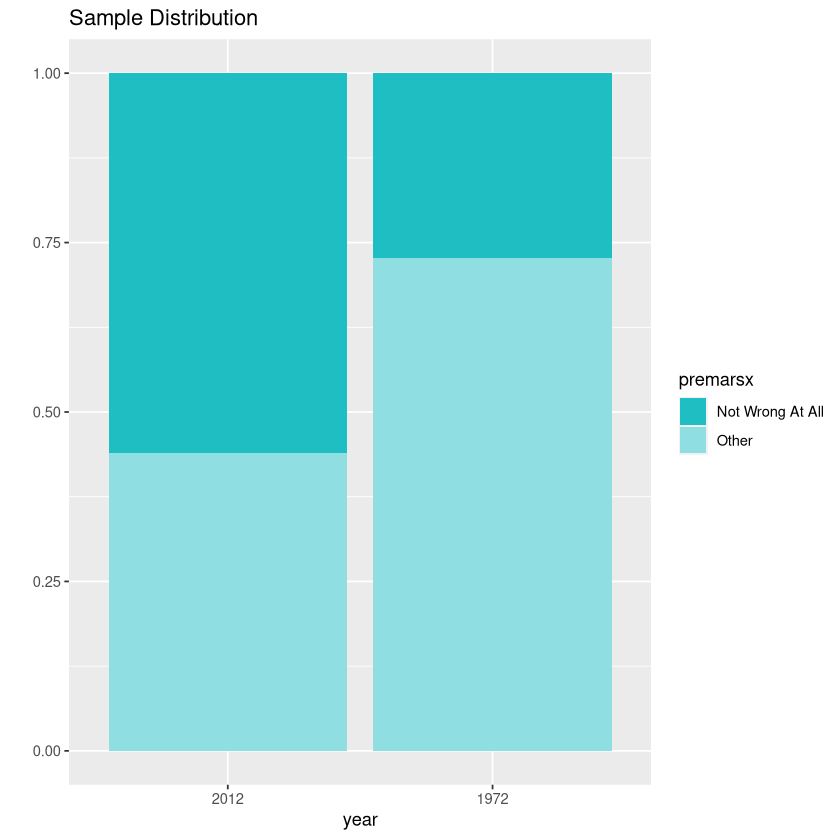

In [10]:
inference(y=premarsx, x=year, data=premsx_ht, statistic="proportion", type="ci",
          method="theoretical", success="Not Wrong At All", order = c("2012","1972"))


### Conclusions

The inference methods provide strong evidence in favor of the $H_A$: In fact there's a mind shift in public opinion and `premarital sex` is more accepted in the latest years. Hence, the null hypothesis is rejected by the two methods. 

We've used a top down approach in the analysis of our hypothesis. We began checking if there's a shift in the distribution of proportions for each of the 4 groups between 1972 and 2012. Given the p-value obtained (`p-value < 2.2e-16`) which is << $\alpha=0.05$ we conclude the distributions in each group changed dramatically, as it can also be observed in the bar plot from the previous section.

However, a Chi-squared GOF tests don't tell us if the **particular** group of interest has changed significantly. For so, a difference of two proportions was used. In order to compare the groups properly, all the categories which weren't of interest, were grouped together. The hypothesis test threw a strong result in favor of the $H_A$, since the `p_value < 0.0001` well below the significance level proposed for the analysis.

Additionally, a `confidence interval` was calculated for the last test, which shows that the $H_0$ condition, which in this context is a difference between proportions equal to zero ($p̂1 − p̂2 = 0$) is **not included** in the interval. This result is expected since the p-value favor the rejection of the $H_0$.

## References

[Smith, Tom W., Michael Hout, and Peter V. Marsden. General Social Survey, 1972-2012 . ICPSR34802-v1. Storrs, CT: Roper Center for Public Opinion Research, University of Connecticut /Ann Arbor, MI: Inter-university Consortium for Political and Social Research distributors, 2013-09-11.](doi:10.3886/ICPSR34802.v1)

[OpenIntro Statistics Fourth Edition David Diez Data Scientist OpenIntro, Mine Cetinkaya-Rundel Associate Professor of the Practice, Duke University Professional Educator, RStudio
Christopher D Barr Investment Analyst Varadero Capital](https://open.umn.edu/opentextbooks/textbooks/60)